In [34]:
import requests
from datetime import datetime, timezone
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

ROOT_URL = "https://192.168.43.222/piwebapi"
COMPUTER = "WIN-5MGCA5NMS7S"
DATABASE = "Database1"
USERNAME = f"{COMPUTER}\Administrator"
PASSWORD = "abcd1234.."

In [19]:
# Test Server
response_server = requests.get(f"{ROOT_URL}/", auth=(USERNAME, PASSWORD), verify=False)
response_server.json()

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Links': {'Self': 'https://192.168.43.222/piwebapi/',
  'AssetServers': 'https://192.168.43.222/piwebapi/assetservers',
  'DataServers': 'https://192.168.43.222/piwebapi/dataservers',
  'Omf': 'https://192.168.43.222/piwebapi/omf',
  'System': 'https://192.168.43.222/piwebapi/system'}}

In [20]:
# Get Database WebID
elementPath = f"\\\\{COMPUTER}\\{DATABASE}"
rsp_element_raw = requests.get(f"{ROOT_URL}/assetdatabases?path={elementPath}", auth=(USERNAME, PASSWORD), verify=False)
DATABASE_WEBID = rsp_element_raw.json()['WebId']

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [21]:
# Get By Path Element
elementPath = f"\\\\{COMPUTER}\\{DATABASE}\\NuGreen\\Tucson\\Distilling Process\\Equipment\\F-110"
rsp_element_raw = requests.get(f"{ROOT_URL}/elements?path={elementPath}", auth=(USERNAME, PASSWORD), verify=False)
rsp_element_json = rsp_element_raw.json()

rsp_atr_raw = requests.get(rsp_element_json['Links']['Attributes'], auth=(USERNAME, PASSWORD), verify=False)
rsp_atr_json = rsp_atr_raw.json()
rsp_atr_json

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Links': {'First': 'https://192.168.43.222/piwebapi/elements/F1EmQZWL8ggqOE-1j-5lxqU0xwggpn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxESVNUSUxMSU5HIFBST0NFU1NcRVFVSVBNRU5UXEYtMTEw/attributes?startIndex=0',
  'Last': 'https://192.168.43.222/piwebapi/elements/F1EmQZWL8ggqOE-1j-5lxqU0xwggpn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxESVNUSUxMSU5HIFBST0NFU1NcRVFVSVBNRU5UXEYtMTEw/attributes?startIndex=0'},
 'Items': [{'WebId': 'F1AbEQZWL8ggqOE-1j-5lxqU0xwggpn5Gnv7hGvRwgAJ7O7QQCw3sQ9NDNVAjapFvvD2gRwV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxESVNUSUxMSU5HIFBST0NFU1NcRVFVSVBNRU5UXEYtMTEwfEFTU0VUIE5BTUU',
   'Id': '43ec0d0b-43d3-5035-236a-916fbc3da047',
   'Name': 'Asset Name',
   'Description': 'Asset Process Name',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Tucson\\Distilling Process\\Equipment\\F-110|Asset Name',
   'Type': 'String',
   'TypeQualifier': '',
   'DefaultUnitsName': '',
   'DefaultUnitsNameAbbrevi

In [22]:
# Search By Elements
rsp_elmQuery_raw = requests.get(f"{ROOT_URL}/elements/search?databaseWebId={DATABASE_WEBID}&query=Name:=*b-2* Template:=Boiler", auth=(USERNAME, PASSWORD), verify=False)
rsp_elmQuery_json = rsp_elmQuery_raw.json() 
rsp_elmQuery_json

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Links': {'First': 'https://192.168.43.222/piwebapi/elements/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Name%3a%3d*b-2*+Template%3a%3dBoiler&startIndex=0',
  'Last': 'https://192.168.43.222/piwebapi/elements/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Name%3a%3d*b-2*+Template%3a%3dBoiler&startIndex=-1000'},
 'Items': [{'WebId': 'F1EmQZWL8ggqOE-1j-5lxqU0xwPwtn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXEhPVVNUT05cTUlMTElORyBQUk9DRVNTXEVRVUlQTUVOVFxCLTIwOQ',
   'Id': 'e4670b3f-ef69-11ee-af47-080027b3bb41',
   'Name': 'B-209',
   'Description': 'Boiler B-209',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Houston\\Milling Process\\Equipment\\B-209',
   'TemplateName': 'Boiler',
   'HasChildren': False,
   'CategoryNames': ['Equipment Assets'],
   'ExtendedProperties': {},
   'Links': {'Self': 'https://192.168.43.222/piwebapi/elemen

In [23]:
# Search By Attributes
rsp_attrQuery_raw = requests.get(f"{ROOT_URL}/attributes/search?databaseWebId={DATABASE_WEBID}&query=Element:{{ Template:='Unit' }} Name:='*flow*' Description:='*flow rate*'", auth=(USERNAME, PASSWORD), verify=False)
rsp_attrQuery_json = rsp_attrQuery_raw.json() 
rsp_attrQuery_json

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Links': {'First': 'https://192.168.43.222/piwebapi/attributes/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Element%3a%7b+Template%3a%3d%27Unit%27+%7d+Name%3a%3d%27*flow*%27+Description%3a%3d%27*flow+rate*%27&startIndex=0',
  'Last': 'https://192.168.43.222/piwebapi/attributes/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Element%3a%7b+Template%3a%3d%27Unit%27+%7d+Name%3a%3d%27*flow*%27+Description%3a%3d%27*flow+rate*%27&startIndex=-1000'},
 'Items': [{'WebId': 'F1AbEQZWL8ggqOE-1j-5lxqU0xwQgtn5Gnv7hGvRwgAJ7O7QQikyvQksaNFM1IBmuwgyg4QV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXEhPVVNUT05cTUlMTElORyBQUk9DRVNTXEVRVUlQTUVOVFxCLTQ5OXxGVUVMIEdBUyBGTE9X',
   'Id': '42af4c8a-1a4b-5334-3520-19aec20ca0e1',
   'Name': 'Fuel Gas Flow',
   'Description': 'Fuel Gas Flow Rate',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Houston\\Milling Process\\Equipment\\B-499|

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


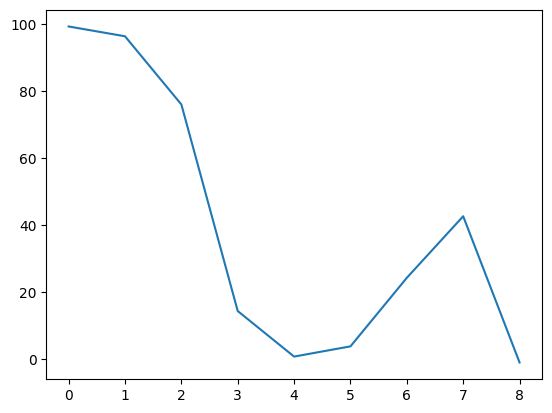

In [24]:
# Get Stream Data
rsp_strm_raw = requests.get(f"{ROOT_URL}/streams/{rsp_attrQuery_json['Items'][0]['WebId']}/recorded?startTime=*-27d&endTime=*-26d", auth=(USERNAME, PASSWORD), verify=False)
rsp_strm_json = rsp_strm_raw.json() 

# And Plot It
data_recorded = np.array([])
for data_now in rsp_strm_json['Items']:
    try:
        float(data_now['Value'])
        data_recorded = np.append(data_recorded, data_now['Value'])

        # datetime.fromisoformat('2024-04-28T21:09:04Z'[:-1])
    except:
        data_recorded = np.append(data_recorded, -1)

fig, ax = plt.subplots()
ax.plot(data_recorded)
plt.show()

In [25]:
# Search By Attributes for all PI Points
rsp_attrQuery_raw = requests.get(f"{ROOT_URL}/attributes/search?databaseWebId={DATABASE_WEBID}&query=Element:{{ Template:='Unit' }} Name:='*flow*' Description:='*flow rate*' PlugInName:='*pi point*'", auth=(USERNAME, PASSWORD), verify=False)
rsp_attrQuery_json = rsp_attrQuery_raw.json() 
rsp_attrQuery_json

/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Links': {'First': 'https://192.168.43.222/piwebapi/attributes/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Element%3a%7b+Template%3a%3d%27Unit%27+%7d+Name%3a%3d%27*flow*%27+Description%3a%3d%27*flow+rate*%27+PlugInName%3a%3d%27*pi+point*%27&startIndex=0',
  'Last': 'https://192.168.43.222/piwebapi/attributes/search?databaseWebId=F1RDQZWL8ggqOE-1j-5lxqU0xwZGyWteH5qUCoq4Mby95DlgV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMQ&query=Element%3a%7b+Template%3a%3d%27Unit%27+%7d+Name%3a%3d%27*flow*%27+Description%3a%3d%27*flow+rate*%27+PlugInName%3a%3d%27*pi+point*%27&startIndex=-1000'},
 'Items': [{'WebId': 'F1AbEQZWL8ggqOE-1j-5lxqU0xwQgtn5Gnv7hGvRwgAJ7O7QQikyvQksaNFM1IBmuwgyg4QV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXEhPVVNUT05cTUlMTElORyBQUk9DRVNTXEVRVUlQTUVOVFxCLTQ5OXxGVUVMIEdBUyBGTE9X',
   'Id': '42af4c8a-1a4b-5334-3520-19aec20ca0e1',
   'Name': 'Fuel Gas Flow',
   'Description': 'Fuel Gas Flow Rate',
   'Path': '\\\\WIN-5MGCA5NMS7

In [26]:
# Get By Path Element
elementPath = f"\\\\{COMPUTER}\\{DATABASE}\\NuGreen\\Tucson"
rsp_element_raw = requests.get(f"{ROOT_URL}/elements?path={elementPath}", auth=(USERNAME, PASSWORD), verify=False)
rsp_element_json = rsp_element_raw.json()

rsp_atr_raw = requests.get(f"{ROOT_URL}/elements/{rsp_element_json['WebId']}/elements?searchFullHierarchy=True&selectedFields=Items.WebId;Items.Name;Items.HasChildren;Items.Path", auth=(USERNAME, PASSWORD), verify=False)
rsp_atr_json = rsp_atr_raw.json()
rsp_atr_json


/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/arkiven4/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host '192.168.43.222'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'Items': [{'WebId': 'F1EmQZWL8ggqOE-1j-5lxqU0xwdgpn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxESVNUSUxMSU5HIFBST0NFU1NcRVFVSVBNRU5UXEItMTE3',
   'Name': 'B-117',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Tucson\\Distilling Process\\Equipment\\B-117',
   'HasChildren': False},
  {'WebId': 'F1EmQZWL8ggqOE-1j-5lxqU0xwtQpn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxDUkFDS0lORyBQUk9DRVNTXEVRVUlQTUVOVFxCLTMwOQ',
   'Name': 'B-309',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Tucson\\Cracking Process\\Equipment\\B-309',
   'HasChildren': False},
  {'WebId': 'F1EmQZWL8ggqOE-1j-5lxqU0xwxApn5Gnv7hGvRwgAJ7O7QQV0lOLTVNR0NBNU5NUzdTXERBVEFCQVNFMVxOVUdSRUVOXFRVQ1NPTlxDUkFDS0lORyBQUk9DRVNTXEVRVUlQTUVOVFxCLTU1NQ',
   'Name': 'B-555',
   'Path': '\\\\WIN-5MGCA5NMS7S\\Database1\\NuGreen\\Tucson\\Cracking Process\\Equipment\\B-555',
   'HasChildren': False},
  {'WebId': 'F1EmQZWL8ggqOE-1j-5lxqU0xwpgpn5Gnv7hGvRwgAJ7O7QQV0lOLTVN

In [36]:
for data_value in rsp_atr_json['Items']:
    if data_value['HasChildren'] == False:
        current_path = data_value['Path'].replace(f"\\\\{COMPUTER}\\{DATABASE}\\", "").replace("\\", "/")
        Path(Path(current_path).parent).mkdir(parents=True, exist_ok=True)

        json_object = json.dumps(data_value, indent=4)
        with open(current_path + "_metadata.json", "w") as outfile:
            outfile.write(json_object)

In [37]:
current_path + "_metadata.json"

'NuGreen/Tucson/Distilling Process/Equipment/P-871_metadata.json'